In [1]:
from kneed import DataGenerator, KneeLocator
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import scipy.io
import json
import numpy as np
from format_data import *
from utils import *
import pickle
from delta_frequency import *

In [2]:
t_pre = 0.2#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)
#gc = np.arange(0, 32)

In [3]:
path = '/auto/data2/eTheremin/ALTAI/ALTAI_20240822_SESSION_00/'

In [4]:

t_pre = 0.2#0.2
t_post = 0.30#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)

data = np.load(path+'headstage_0/data_0.005.npy', allow_pickle=True)
features = np.load(path+'headstage_0/features_0.005.npy', allow_pickle=True)
gc = np.load(path+'headstage_0/good_clusters.npy', allow_pickle=True)

In [5]:
psth, delta_f = get_delta_f(data, features, t_pre, t_post, bin_width, gc)

/home/felicie/Desktop/Analyse/analysebingobike/delta_frequency.py:101: RuntimeWarning: divide by zero encountered in scalar divide
  diff = math.log2(features[bin]['Played_frequency']/features[bin]['Mock_frequency'])


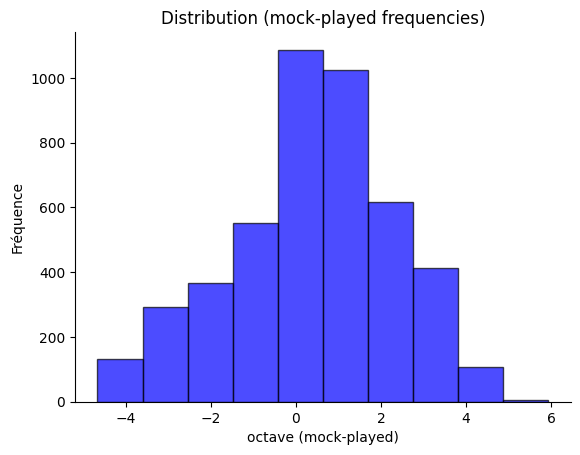

In [6]:
plot_distribution(delta_f, 10)

[-3  0  3  6]


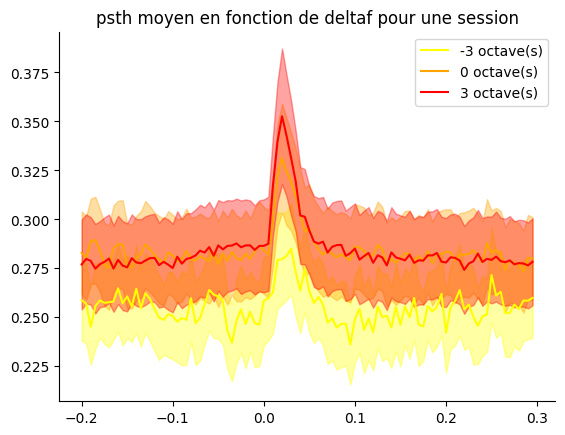

In [7]:
plot_psth_function_of_deltaf(psth, delta_f, 3, gc, psth_bins)

In [8]:
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
playback = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback')

In [9]:
m_tracking = np.nanmean(tracking, axis=1)
mm_tracking = np.nanmean(m_tracking, axis = 0)
m_playback = np.nanmean(playback, axis=1)
mm_playback = np.nanmean(m_playback, axis = 0)

[-3  1  5]


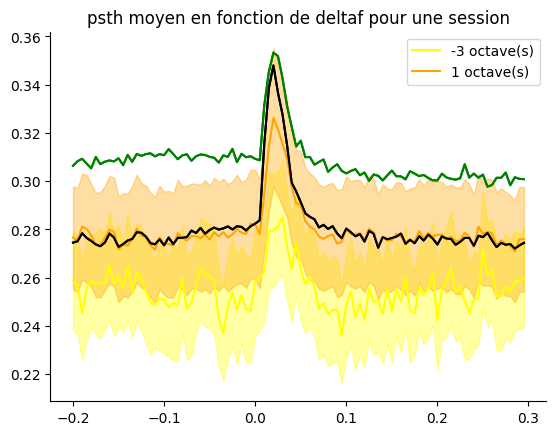

In [10]:
average, intervals = deltaf_for_cluster(psth, delta_f, 4, gc)
for interval in range(len(average[0])-1):
    psth_interval = [ligne[interval] for ligne in average]
    sem_interval = get_sem(np.array(psth_interval))
        
    average_interval = np.nanmean(psth_interval, axis=0)

        

    plt.plot(psth_bins, average_interval, label = f'{intervals[interval]} octave(s)', c = colors[interval])
    plt.plot(psth_bins, mm_tracking, c = 'green')
    plt.plot(psth_bins, mm_playback, c = 'black')
    plt.fill_between(psth_bins, np.array(average_interval) - np.array(sem_interval), np.array(average_interval) + np.array(sem_interval), alpha=0.2, color = colors[interval])
    plt.fill_between(psth_bins, np.array(average_interval) - np.array(sem_interval), np.array(average_interval) + np.array(sem_interval), alpha=0.2, color = colors[interval])
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.title('psth moyen en fonction de deltaf pour une session')
    

In [14]:
matching_triggers = match_triggers(features)

In [82]:
delta_f, tracking, playback = [], [], []
for block in range(1,7):
    delta_f_block = []
    idx_tracking = matching_triggers[block]['idx_tracking']
    idx_playback = matching_triggers[block]['idx_playback']
    for idx in idx_playback:
        delta_f_block.append(math.log2(features[idx]['Played_frequency']/features[idx]['Mock_frequency']))
    delta_f_block = [0 if np.isinf(x) else x for x in delta_f_block]
    delta_f.append(delta_f_block)


    # je calcule les tracking correspondants poura voir les mêmes indices
    block_playback, block_tracking = [], []
    for cluster in gc:
        psth_clus_tr, psth_clus_pb = [], []
        for bin in idx_tracking:
            if bin-int(t_pre/bin_width)>0 and bin+int(t_post/bin_width)<len(features):
                    if features[bin]['Frequency_changes']>0 and features[bin]['Condition']==0 :
                        psth_clus_tr.append(data[cluster][bin-int(t_pre/bin_width):bin+int(t_post/bin_width)])
        block_tracking.append(psth_clus_tr)

        for bin in idx_playback:
            if bin-int(t_pre/bin_width)>0 and bin+int(t_post/bin_width)<len(features):
                    if features[bin]['Frequency_changes']>0 and features[bin]['Condition']==1 :
                        psth_clus_pb.append(data[cluster][bin-int(t_pre/bin_width):bin+int(t_post/bin_width)])
        block_playback.append(psth_clus_pb)
    tracking.append(block_tracking)
    playback.append(block_playback)




/tmp/ipykernel_130673/514968272.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  delta_f_block.append(math.log2(features[idx]['Played_frequency']/features[idx]['Mock_frequency']))


In [ ]:
tracking_ = np.hstack(tracking)
playback_ = np.hstack(playback)
delta_f_ = np.hstack(delta_f)
print(len(tracking_[0]), len(delta_f_), len(playback_[0]))
# ok cooooool! j'ai les psth en tracking, leur équivalent en playback et leur delta_f correspondant en playback

4596 4596 4596


[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]